# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


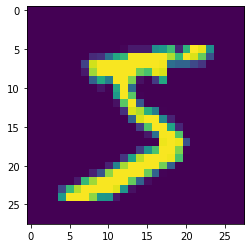

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

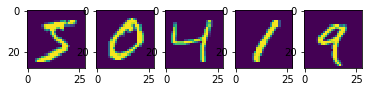

In [5]:
# look for few more images to get the idea of number of pixels network must see to get the gradient/edges extractions
num_images = 5
for index,image in enumerate(X_train[:num_images]):
  plt.subplot(2,num_images,index+1)
  plt.imshow(X_train[index])


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
from keras.layers import Activation
model = Sequential(name="model_mnist")

# Block-1 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1), use_bias = False, name="blk1_conv_layer1")) # 26X26X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk1_conv_layer2")) # 24X24X64
model.add(MaxPooling2D((2,2), name="blk1_maxpool")) # 12X12X64
model.add(Convolution2D(32,(1,1), activation='relu', use_bias = False, name="blk1_conv_layer3")) # 12X12X32

# Block-2 Convolutions
model.add(Convolution2D(32,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer1")) # 10X10X32
model.add(Convolution2D(64,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer2")) # 8X8X64
model.add(Convolution2D(128,(3,3), activation='relu', use_bias = False, name="blk2_conv_layer3")) # 6X6X128
model.add(MaxPooling2D((2,2), name="blk2_maxpool"))  # 3X3X128
model.add(Convolution2D(10,(1,1), activation='relu', use_bias = False, name="blk2_conv_layer4")) # 3X3X10

# Block-3 : just to get 10 channels as we have 10 classes at output
model.add(Convolution2D(10,(3,3), use_bias = False, name="blk3_conv_layer1")) # 1X1X10

model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name="output"))

In [12]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_conv_layer1 (Conv2D)    (None, 26, 26, 32)        288       
_________________________________________________________________
blk1_conv_layer2 (Conv2D)    (None, 24, 24, 64)        18432     
_________________________________________________________________
blk1_maxpool (MaxPooling2D)  (None, 12, 12, 64)        0         
_________________________________________________________________
blk1_conv_layer3 (Conv2D)    (None, 12, 12, 32)        2048      
_________________________________________________________________
blk2_conv_layer1 (Conv2D)    (None, 10, 10, 32)        9216      
_________________________________________________________________
blk2_conv_layer2 (Conv2D)    (None, 8, 8, 64)          18432     
_________________________________________________________________
blk2_conv_layer3 (Conv2D)    (None, 6, 6, 128)         

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=28, nb_epoch=16, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/16





60000/60000 [==============================] - 13s 222us/step - loss: 0.1696 - acc: 0.9466
Epoch 2/16
60000/60000 [==============================] - 11s 178us/step - loss: 0.0544 - acc: 0.9834
Epoch 3/16
60000/60000 [==============================] - 11s 181us/step - loss: 0.0383 - acc: 0.9882
Epoch 4/16
60000/60000 [==============================] - 11s 177us/step - loss: 0.0310 - acc: 0.9906
Epoch 5/16
60000/60000 [==============================] - 11s 182us/step - loss: 0.0255 - acc: 0.9919
Epoch 6/16
60000/60000 [==============================] - 11s 178us/step - loss: 0.0213 - acc: 0.9933
Epoch 7/16
60000/60000 [==============================] - 11s 178us/step - loss: 0.0185 - acc: 0.9942
Epoch 8/16
60000/60000 [==============================] - 11s 180us/step - loss: 0.0160 - acc: 0.9947
Epoch 9/16
60000/60000 [==============================] - 11s 180us/step - loss: 0.0148 - acc: 0.9955
Epoch 10/16
60000/60000 [==============================] - 11s 178us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [16]:
print(score)

[0.0291597472808759, 0.9929]


In [0]:
y_pred = model.predict(X_test)

In [18]:
print(y_pred[:9])
print(y_test[:9])

[[1.0301798e-08 2.5138128e-11 8.8858940e-08 1.2880144e-10 1.0401662e-12
  7.8868500e-15 4.8929303e-15 9.9999988e-01 1.1998816e-10 9.7269458e-12]
 [1.7681495e-10 2.6216926e-10 1.0000000e+00 1.6161817e-11 5.5017893e-13
  6.8536195e-17 7.1930065e-13 6.3033065e-18 9.7473947e-12 4.2982785e-21]
 [6.9521645e-14 1.0000000e+00 1.1778847e-13 2.9513506e-17 1.1092336e-09
  2.1287841e-10 9.7569841e-10 2.1613045e-11 9.7048244e-11 1.0623836e-10]
 [9.9999833e-01 5.3020224e-13 3.5575987e-10 5.3636620e-09 4.5192756e-09
  5.6503984e-07 7.5733305e-07 4.9059989e-10 5.6786759e-10 3.1450529e-07]
 [3.6608725e-25 2.6095630e-15 2.1796279e-18 1.5149280e-21 1.0000000e+00
  3.5179334e-22 4.0511485e-18 3.6456136e-17 5.3983505e-13 6.4809061e-11]
 [2.7387004e-13 1.0000000e+00 1.7991248e-13 3.8158239e-16 1.0534679e-08
  2.6424286e-12 8.2523337e-12 2.5269489e-09 3.4743826e-11 2.1996732e-08]
 [1.9525248e-17 3.5597790e-08 9.4069530e-11 2.6334490e-10 9.9999964e-01
  2.6265730e-13 3.7001421e-13 1.6973443e-13 1.2119325e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

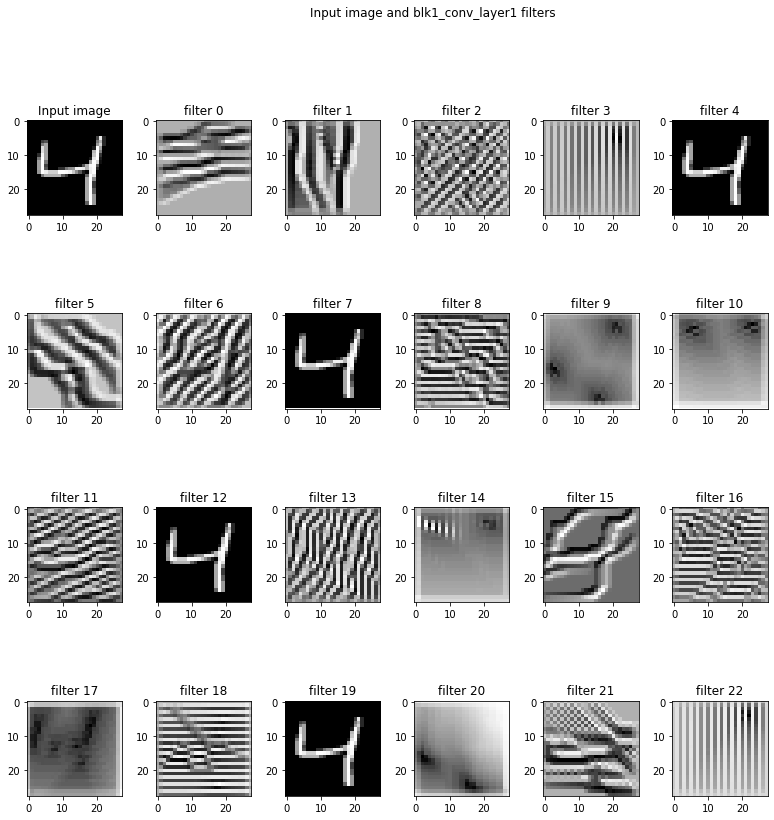

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'blk1_conv_layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

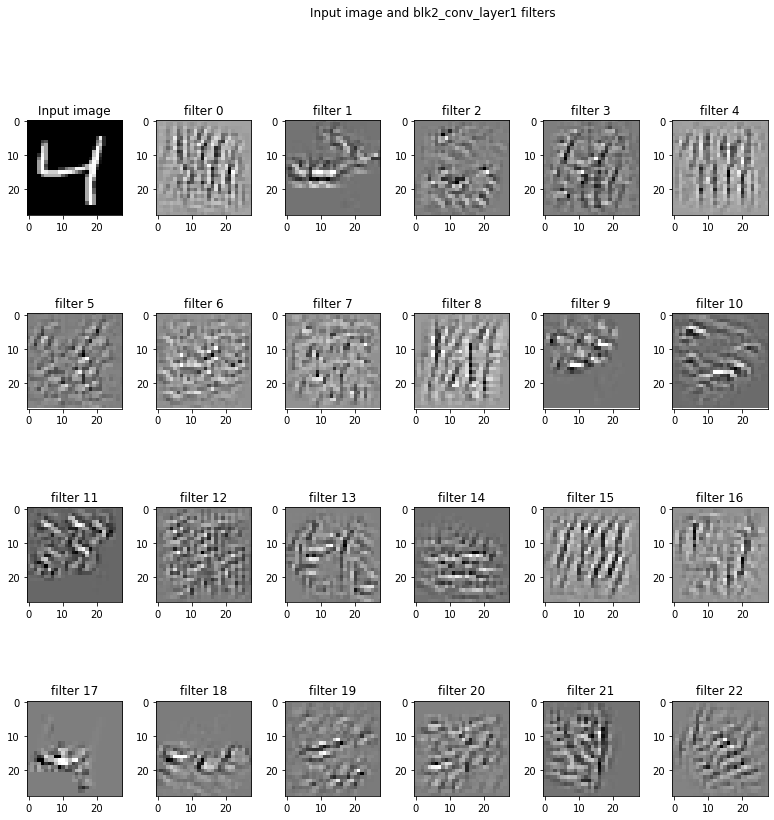

In [21]:
vis_img_in_filter(layer_name = 'blk2_conv_layer1')

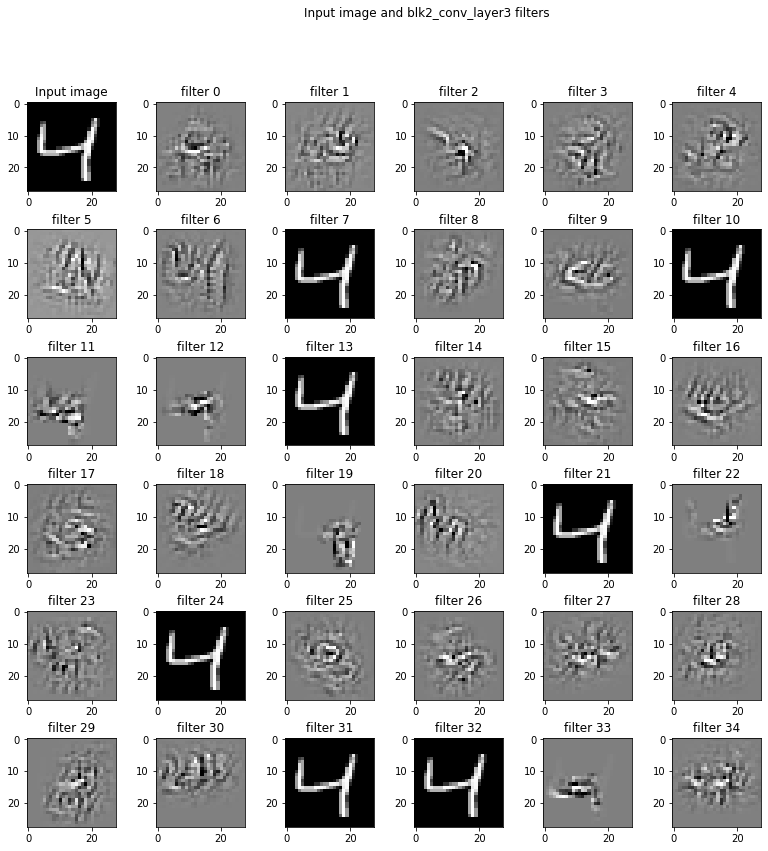

In [22]:
vis_img_in_filter(layer_name = 'blk2_conv_layer3')